## (B) Data exploration

### Instructions

Start by some quick **data exploration**. Perform the following tasks

1. Plot a few images from each category
2. Make a **scree plot**, how many PCA components explain 10%, 20%, …, 90% and 100% of the variance?
3. **Visualize the features on a 2d-plot with PCA using the first two components.** What can you say about the results?

#### Loading high-level features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the npz file
with np.load('swissroads_highlevel_features.npz', allow_pickle=False) as npz_file:
    # It's a dictionary-like object
    print(list(npz_file.keys()))

['features_train', 'labels_train', 'features_valid', 'labels_valid', 'features_test', 'labels_test', 'imgs_train', 'imgs_valid', 'imgs_test']


In [3]:
with np.load('swissroads_highlevel_features.npz', allow_pickle=False) as npz_file:
    # Load the arrays
    features_tr = npz_file['features_train']
    labels_tr = npz_file['labels_train']
    features_va = npz_file['features_valid']
    labels_va = npz_file['labels_valid']
    features_te = npz_file['features_test']
    labels_te = npz_file['labels_test']
    imgs_tr = npz_file['imgs_train']
    imgs_va = npz_file['imgs_valid']
    imgs_te = npz_file['imgs_test']
labels = ['bike','car','motorcycle','other','truck','van']

print('features_tr:', features_tr.shape)
print('labels_tr:', labels_tr.shape)
print('features_va:', features_va.shape)
print('labels_va:', labels_va.shape)
print('features_te:', features_te.shape)
print('labels_te:', labels_te.shape)
print('imgs_tr:', imgs_tr.shape)
print('imgs_va:', imgs_va.shape)
print('imgs_te:', imgs_te.shape)

features_tr: (280, 2048)
labels_tr: (280,)
features_va: (139, 2048)
labels_va: (139,)
features_te: (50, 2048)
labels_te: (50,)
imgs_tr: (280, 299, 299, 3)
imgs_va: (139, 299, 299, 3)
imgs_te: (50, 299, 299, 3)


### Task B

#### i. Plot images from each category

In [4]:
print(features_tr[1])
print(labels_tr[1])
#print(trainset_bis.class_indices)
print(labels)

[0.50903946 0.21687616 0.09093793 ... 0.46457085 0.20937455 0.3434889 ]
3.0
['bike', 'car', 'motorcycle', 'other', 'truck', 'van']


In [5]:
imgs_tr[1].shape

(299, 299, 3)

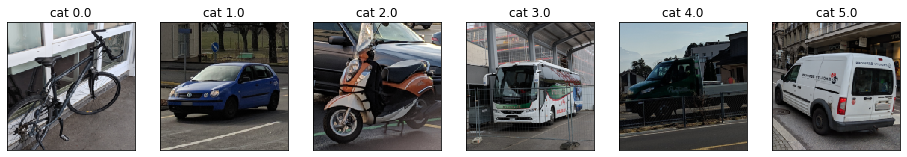

['bike', 'car', 'motorcycle', 'other', 'truck', 'van']


In [6]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 16))

for category in np.arange(0,6):
    n = pd.DataFrame(labels_tr)[pd.DataFrame(labels_tr)[0] == category].index[0]

    axes[category].set_title('cat {}'.format(labels_tr[n]))
    axes[category].imshow(imgs_tr[n])
    axes[category].get_xaxis().set_visible(False) # Disable x-axis
    axes[category].get_yaxis().set_visible(False) # Disable y-axis

plt.show()
# how to replace one-hot encoded by true names?
#print(trainset_bis.class_indices)
print(labels)

#### ii. Scree plot

* Creating the X/y arrays (nothing extra needed as already arrays)
* Standardize data to avoid that algo favor variables with a large variance
* Compute all the components and their explained variance scores to produce a bar chart with the proportion of variance explained for each component.

In [7]:
X = features_tr
y = labels_tr

print('X:', X.shape)
print('y:', y.shape)

X: (280, 2048)
y: (280,)


In [8]:
from sklearn.preprocessing import StandardScaler

# Create Standard Scaler
scaler = StandardScaler()

# Rescale data
X_rescaled = scaler.fit_transform(X)

In [9]:
from sklearn.decomposition import PCA

for x in [2,5,10,25,50,75,100,150,200,250]:
    # Create PCA transformer
    pca_test = PCA(n_components=x)

    # Apply PCA to rescaled data
    # pca2.fit(X_rescaled)
    pca_test.fit(X_rescaled, y=None) # Unsupervised learning, no y variable

    # Proportion of variance explaiend (pve)
    pve_test = pca_test.explained_variance_ratio_
    print('{:.0f}% of variance explained with {} components'.format(pve_test.sum()*100,x))

19% of variance explained with 2 components
34% of variance explained with 5 components
43% of variance explained with 10 components
58% of variance explained with 25 components
71% of variance explained with 50 components
80% of variance explained with 75 components
85% of variance explained with 100 components
92% of variance explained with 150 components
97% of variance explained with 200 components
99% of variance explained with 250 components


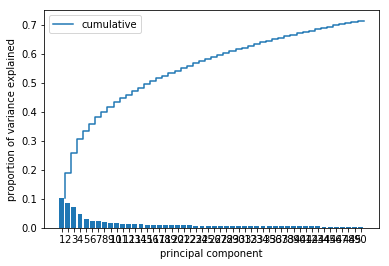

In [10]:
# Create PCA transformer - decidede to limite to 50 to ease readability of chart in next cell
pca = PCA(n_components=50)

# Apply PCA to rescaled data
pca.fit(X_rescaled, y=None) # Unsupervised learning, no y variable

# Proportion of variance explaiend
pve = pca.explained_variance_ratio_

# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

#### iii. Visualize the features on a 2d-plot with PCA

* Compute the two principal components with the PCA estimator from Scikit-learn
* Plot categories on two components

In [11]:
# Create PCA transformer
pca2 = PCA(n_components=2)

# Apply PCA to rescaled data
pca2.fit(X_rescaled, y=None);

In [12]:
pca2

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
# Project data onto the first two components
X_2d_rescaled = pca2.transform(X)

In [14]:
print('Shape of X_rescaled:',X_rescaled.shape)
print('Shape of X_2d_rescaled:',X_2d_rescaled.shape)
print('Shape of loading vectors:',pca2.components_.shape)

Shape of X_rescaled: (280, 2048)
Shape of X_2d_rescaled: (280, 2)
Shape of loading vectors: (2, 2048)


In [15]:
# Get the loading vectors
pca2.components_

array([[-0.00737121,  0.02229385, -0.00823313, ..., -0.02287627,
         0.00572542, -0.01489257],
       [-0.01124595, -0.00566183,  0.01741685, ..., -0.00849155,
        -0.03258441,  0.00030683]], dtype=float32)

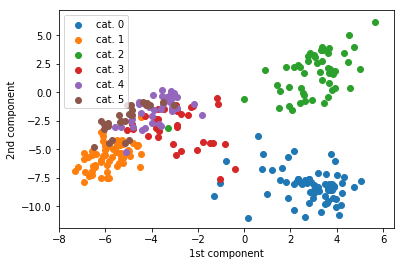

In [16]:
# Plot each categories
for cat in np.arange(0,6):
    # Wine samples of this type
    idx = (y == cat)
    
    # Plot their components
    plt.scatter(
        X_2d_rescaled[idx,0], X_2d_rescaled[idx, 1],
        label='cat. {}'.format(cat)
        )
        
# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

### Comments
* Only 19% of the variance is explained with the 2 most important components,however for half to categories we have a clear slit: 
* >For some categories we have a good performance (categories: 0,1,2)
* >For some categories we would need some additional components to split them more accuractly (categories: 3,4,5)

### Notes/Questions on Task B (Greg)
* Shall have rescaled data or not needed as already rescaling applied to all images with 'ImageDataGenerator' *(cell 8)*
* Shall I have included input data from validation and test sets as well? A larger number of data points would have improve PCA performance *(cell 9)*